In [2]:
using QuantumOptics
using Plots

# 1. The Hamiltonian Builder 
function build_2d_lattice(L, wc, J, cutoff)
    N = L * L
    println("Building 2D Lattice: $L x $L (N=$N)")

    b_mode = FockBasis(cutoff - 1)
    b_total = tensor([b_mode for i in 1:N]...)

    a = destroy(b_mode)
    at = create(b_mode)
    n = number(b_mode)
    
    H = SparseOperator(b_total)

    # A list of number operators to measure occupancy later
    n_ops = [embed(b_total, i, n) for i in 1:N]

    for x in 1:L
        for y in 1:L
            current_idx = x + (y-1)*L
            
            # Self Energy
            H += wc * embed(b_total, current_idx, n)

            # Hopping right
            if x < L
                right_idx = (x+1) + (y-1)*L
                at_c = embed(b_total, current_idx, at); a_c = embed(b_total, current_idx, a)
                at_r = embed(b_total, right_idx, at);   a_r = embed(b_total, right_idx, a)
                H += -J * (at_c * a_r + at_r * a_c)
            end

            # Hopping up
            if y < L
                up_idx = x + ((y+1)-1)*L
                at_c = embed(b_total, current_idx, at); a_c = embed(b_total, current_idx, a)
                at_u = embed(b_total, up_idx, at);      a_u = embed(b_total, up_idx, a)
                H += -J * (at_c * a_u + at_u * a_c)
            end
        end
    end
    return H, b_total, n_ops
end

# 2. Simulation
println("Initializing Simulation")

# Parameters
L = 3          # 3x3 Grid
N = L*L        # 9 Cavities
wc = 1.0       # Frequency
J = 1.0        # High hopping rate (so it moves fast)
cutoff = 2     # Max 1 photon per site (Hardcore boson limit)

# Build System
H, b_total, n_ops = build_2d_lattice(L, wc, J, cutoff)

# 3. Create Initial State (Photon in the Center)
center_idx = Int((N + 1) / 2) 

# Start with vacuum everywhere
initial_states = [fockstate(FockBasis(cutoff-1), 0) for i in 1:N]
# except the center, put 1 photon there
initial_states[center_idx] = fockstate(FockBasis(cutoff-1), 1)

psi0 = tensor(initial_states...)
println("Initial state created: Photon at index $center_idx")

# 4. Time Evolution
T = [0.0, 0.5, 1.0, 2.0, 5.0] # Time steps to measure
println("Running Time Evolution")
tout, psi_t = timeevolution.schroedinger(T, psi0, H)

# --- 5. Visualization (Heatmaps) ---
# We want to see the grid at different times
anim = @animate for (i, t) in enumerate(T)
    # Measure photon number at every site
    n_expect = real(expect.(n_ops,Ref(psi_t[i])))
    
    # Reshape the list of 25 numbers into a 5x5 Matrix
    grid_data = reshape(n_expect, (L, L))
    
    # Plot as Heatmap
    heatmap(grid_data, 
            clims=(0, 1), 
            color=:thermal, 
            title="Time = $t (Photon Spreading)",
            aspect_ratio=:equal,
            xlims=(0.5, L+0.5), ylims=(0.5, L+0.5))
end

# Save the animation
gif(anim, "photon_spread_2d.gif", fps = 0.75)
println("Done! Saved 'photon_spread_2d.gif'")

Initializing Simulation
Building 2D Lattice: 3 x 3 (N=9)
Initial state created: Photon at index 5
Running Time Evolution
Done! Saved 'photon_spread_2d.gif'


[ Info: Saved animation to c:\Users\Vedant\Downloads\Projects\Jaynes Cummings Hubbard Model Simulation\2D_Lattice\photon_spread_2d.gif


Initializing Simulation...
Building 2D Lattice: 4 x 4 (N=16)
Initial state created: Photon at index 9
Running Time Evolution...


[ Info: Saved animation to c:\Users\Vedant\Downloads\Projects\Jaynes Cummings Hubbard Model Simulation\2D_Lattice\photon_spread_2d_2.gif


Plots.AnimatedGif("c:\\Users\\Vedant\\Downloads\\Projects\\Jaynes Cummings Hubbard Model Simulation\\2D_Lattice\\photon_spread_2d_2.gif")
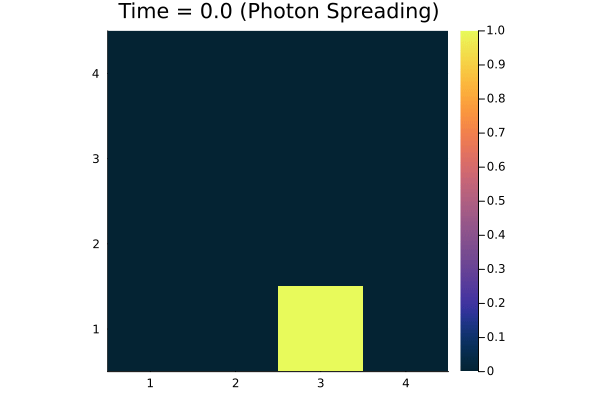

In [3]:
using QuantumOptics
using Plots

# --- 1. The Hamiltonian Builder (From your verified code) ---
function build_2d_lattice(L, wc, J, cutoff)
    N = L * L
    println("Building 2D Lattice: $L x $L (N=$N)")

    b_mode = FockBasis(cutoff - 1)
    b_total = tensor([b_mode for i in 1:N]...)

    a = destroy(b_mode)
    at = create(b_mode)
    n = number(b_mode)
    
    H = SparseOperator(b_total)

    # We also need a list of number operators to measure occupancy later
    n_ops = [embed(b_total, i, n) for i in 1:N]

    for x in 1:L
        for y in 1:L
            current_idx = x + (y-1)*L
            
            # Self Energy
            H += wc * embed(b_total, current_idx, n)

            # Hopping RIGHT
            if x < L
                right_idx = (x+1) + (y-1)*L
                at_c = embed(b_total, current_idx, at); a_c = embed(b_total, current_idx, a)
                at_r = embed(b_total, right_idx, at);   a_r = embed(b_total, right_idx, a)
                H += -J * (at_c * a_r + at_r * a_c)
            end

            # Hopping UP
            if y < L
                up_idx = x + ((y+1)-1)*L
                at_c = embed(b_total, current_idx, at); a_c = embed(b_total, current_idx, a)
                at_u = embed(b_total, up_idx, at);      a_u = embed(b_total, up_idx, a)
                H += -J * (at_c * a_u + at_u * a_c)
            end
        end
    end
    return H, b_total, n_ops
end

# --- 2. Simulation Setup ---
println("Initializing Simulation...")

# Parameters
L = 4          # 5x5 Grid
N = L*L        # 25 Cavities
wc = 1.0       # Frequency
J = 1.0        # High hopping rate (so it moves fast)
cutoff = 2     # Max 1 photon per site (Hardcore boson limit)

# Build System
H, b_total, n_ops = build_2d_lattice(L, wc, J, cutoff)

# --- 3. Create Initial State (Photon in the Center) ---
# Center index for a 5x5 grid is roughly index 13
center_idx = div(N, 2) + 1

# Start with vacuum everywhere...
initial_states = [fockstate(FockBasis(cutoff-1), 0) for i in 1:N]
# ...except the center, put 1 photon there
initial_states[center_idx] = fockstate(FockBasis(cutoff-1), 1)

psi0 = tensor(initial_states...)
println("Initial state created: Photon at index $center_idx")

# --- 4. Time Evolution ---
T = [0.0, 0.5, 1.0, 2.0, 5.0] # Time steps to measure
println("Running Time Evolution...")
tout, psi_t = timeevolution.schroedinger(T, psi0, H)

# --- 5. Visualization (Heatmaps) ---
# We want to see the grid at different times
anim = @animate for (i, t) in enumerate(T)
    # Measure photon number at every site
    n_expect = real(expect.(n_ops,Ref(psi_t[i])))
    
    # Reshape the list of 25 numbers into a 5x5 Matrix
    grid_data = reshape(n_expect, (L, L))
    
    # Plot as Heatmap
    heatmap(grid_data, 
            clims=(0, 1), 
            color=:thermal, 
            title="Time = $t (Photon Spreading)",
            aspect_ratio=:equal,
            xlims=(0.5, L+0.5), ylims=(0.5, L+0.5))
end

# Save the animation
gif(anim, "photon_spread_2d_2.gif", fps = 1)

Initializing Simulation...
Building 2D Lattice: 4 x 4 (N=16)
Initial state created: Photon at index 10
Running Time Evolution...


[ Info: Saved animation to c:\Users\Vedant\Downloads\Projects\Jaynes Cummings Hubbard Model Simulation\2D_Lattice\photon_spread_2d_2.gif


Plots.AnimatedGif("c:\\Users\\Vedant\\Downloads\\Projects\\Jaynes Cummings Hubbard Model Simulation\\2D_Lattice\\photon_spread_2d_2.gif")
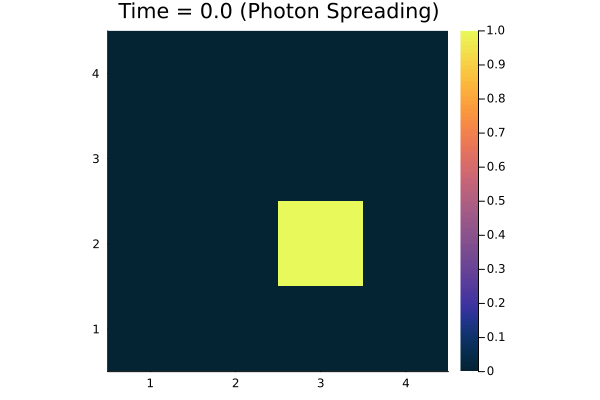

In [4]:
using QuantumOptics
using Plots

# --- 1. The Hamiltonian Builder (From your verified code) ---
function build_2d_lattice(L, wc, J, cutoff)
    N = L * L
    println("Building 2D Lattice: $L x $L (N=$N)")

    b_mode = FockBasis(cutoff - 1)
    b_total = tensor([b_mode for i in 1:N]...)

    a = destroy(b_mode)
    at = create(b_mode)
    n = number(b_mode)
    
    H = SparseOperator(b_total)

    # We also need a list of number operators to measure occupancy later
    n_ops = [embed(b_total, i, n) for i in 1:N]

    for x in 1:L
        for y in 1:L
            current_idx = x + (y-1)*L
            
            # Self Energy
            H += wc * embed(b_total, current_idx, n)

            # Hopping RIGHT
            if x < L
                right_idx = (x+1) + (y-1)*L
                at_c = embed(b_total, current_idx, at); a_c = embed(b_total, current_idx, a)
                at_r = embed(b_total, right_idx, at);   a_r = embed(b_total, right_idx, a)
                H += -J * (at_c * a_r + at_r * a_c)
            end

            # Hopping UP
            if y < L
                up_idx = x + ((y+1)-1)*L
                at_c = embed(b_total, current_idx, at); a_c = embed(b_total, current_idx, a)
                at_u = embed(b_total, up_idx, at);      a_u = embed(b_total, up_idx, a)
                H += -J * (at_c * a_u + at_u * a_c)
            end
        end
    end
    return H, b_total, n_ops
end

# --- 2. Simulation Setup ---
println("Initializing Simulation...")

# Parameters
L = 4          # 5x5 Grid
N = L*L        # 25 Cavities
wc = 1.0       # Frequency
J = 1.0        # High hopping rate (so it moves fast)
cutoff = 2     # Max 1 photon per site (Hardcore boson limit)

# Build System
H, b_total, n_ops = build_2d_lattice(L, wc, J, cutoff)

# --- 3. Create Initial State (Photon in the Center) ---
# Center index for a 5x5 grid is roughly index 13
center_idx = 10

# Start with vacuum everywhere...
initial_states = [fockstate(FockBasis(cutoff-1), 0) for i in 1:N]
# ...except the center, put 1 photon there
initial_states[center_idx] = fockstate(FockBasis(cutoff-1), 1)

psi0 = tensor(initial_states...)
println("Initial state created: Photon at index $center_idx")

# --- 4. Time Evolution ---
T = [0.0, 0.5, 1.0, 2.0, 5.0] # Time steps to measure
println("Running Time Evolution...")
tout, psi_t = timeevolution.schroedinger(T, psi0, H)

# --- 5. Visualization (Heatmaps) ---
# We want to see the grid at different times
anim = @animate for (i, t) in enumerate(T)
    # Measure photon number at every site
    n_expect = real(expect.(n_ops,Ref(psi_t[i])))
    
    # Reshape the list of 25 numbers into a 5x5 Matrix
    grid_data = reshape(n_expect, (L, L))
    
    # Plot as Heatmap
    heatmap(grid_data, 
            clims=(0, 1), 
            color=:thermal, 
            title="Time = $t (Photon Spreading)",
            aspect_ratio=:equal,
            xlims=(0.5, L+0.5), ylims=(0.5, L+0.5))
end

# Save the animation
gif(anim, "photon_spread_2d_2.gif", fps = 1)